# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lib_file import lib_path
import random
import seaborn as sns
import pickle
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import tensorflow as tf

seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
for dirname,_,filenames in os.walk('splitted_data'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

splitted_data\X_test.csv
splitted_data\X_train.csv
splitted_data\y_test.csv
splitted_data\y_train.csv


# Data Loading

In [2]:
X_train=pd.read_csv('splitted_data/X_train.csv')
X_test=pd.read_csv('splitted_data/X_test.csv')
y_train=pd.read_csv('splitted_data/y_train.csv')
y_test=pd.read_csv('splitted_data/y_test.csv')

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8260, 19) (2066, 19) (8260, 1) (2066, 1)


In [3]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,1.0,0.450704,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.5,1.0,1.000000,0.400000,0.223471
1,1.0,1.0,0.0,0.0,0.000000,1.0,1.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.666667,0.701990,0.008078
2,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.311443,0.003548
3,1.0,0.0,1.0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.274627,0.003121
4,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.513930,0.005897


In [4]:
y_train.head()

,Churn
0,0
1,1
2,0
3,1
4,1


In [5]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1.0,0.0,1.0,1.0,0.154930,1.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.000000,0.081095,0.034174
1,1.0,0.0,0.0,1.0,0.957746,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.333333,0.608955,0.632789
2,0.0,1.0,1.0,0.0,0.225352,1.0,1.0,0.5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.666667,0.739303,0.184156
3,1.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.000000,0.496517,0.552723
4,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.5,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.666667,0.662687,0.007622


In [6]:
y_test.head()

,Churn
0,0
1,0
2,0
3,0
4,1


---

# Algorithm-1 : GaussianNB

In [7]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model = gnb_model.fit(X_train.values, y_train.values.ravel())

In [8]:
gnb_prediction = gnb_model.predict(X_test.values)
print(gnb_prediction.tolist())

[0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [9]:
true_values = y_test.values.ravel()
print(true_values.tolist())

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 

### Result Analysis

In [10]:
class_labels = ['No', 'Yes']

***Accuracy Score***

In [11]:
gnb_model_accuracy = accuracy_score(y_true=true_values, y_pred=gnb_prediction)
print("Validation accuracy of GaussianNB model is {:.2f}%".format(gnb_model_accuracy*100))

Validation accuracy of GaussianNB model is 75.51%


***Classification Report***

In [12]:
print(classification_report(y_true=true_values, y_pred=gnb_prediction, target_names=class_labels))

              precision    recall  f1-score   support

          No       0.78      0.71      0.74      1033
         Yes       0.73      0.80      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.75      2066
weighted avg       0.76      0.76      0.75      2066



***Confusion Matrix***

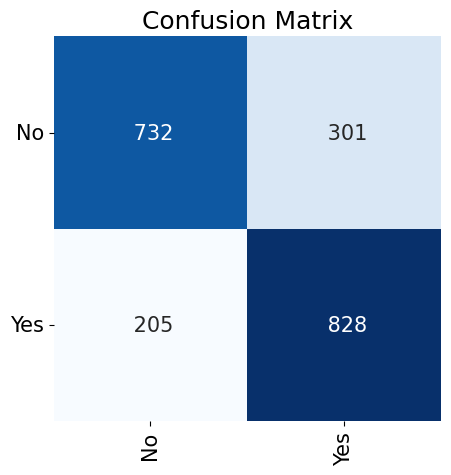

In [13]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_values,y_pred=gnb_prediction),
                                      annot=True,
                                      cmap=plt.cm.Blues,
                                      fmt = "4d",
                                      xticklabels=class_labels,
                                      yticklabels=class_labels,
                                      cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [14]:
with open(file="models/GaussianNB_model.pkl", mode="wb") as file:
    pickle.dump(obj=gnb_model, file=file)

---

# Algorithm-2 : MultinomialNB

In [15]:
from sklearn.naive_bayes import MultinomialNB

mnb_model = MultinomialNB(alpha=1.0)
mnb_model = mnb_model.fit(X_train.values, y_train.values.ravel())

In [16]:
mnb_prediction = mnb_model.predict(X_test.values)
print(mnb_prediction.tolist())

[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [17]:
true_values = y_test.values.ravel()
print(true_values.tolist())

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 

### Result Analysis

In [18]:
class_labels = ['No', 'Yes']

***Accuracy Score***

In [19]:
mnb_model_accuracy = accuracy_score(y_true=true_values, y_pred=mnb_prediction)
print("Validation accuracy of MultinomialNB model is {:.2f}%".format(mnb_model_accuracy*100))

Validation accuracy of MultinomialNB model is 74.35%


***Classification Report***

In [20]:
print(classification_report(y_true=true_values, y_pred=mnb_prediction, target_names=class_labels))

              precision    recall  f1-score   support

          No       0.76      0.71      0.73      1033
         Yes       0.73      0.78      0.75      1033

    accuracy                           0.74      2066
   macro avg       0.74      0.74      0.74      2066
weighted avg       0.74      0.74      0.74      2066



***Confusion Matrix***

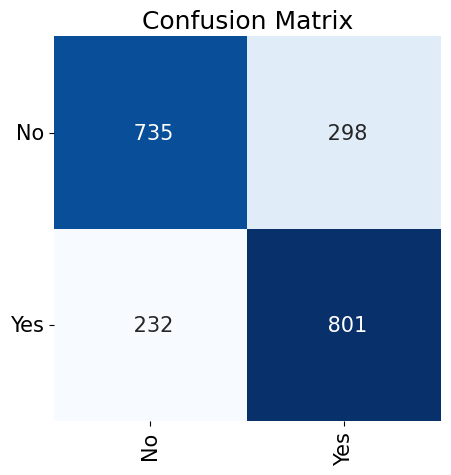

In [21]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_values,y_pred=mnb_prediction),
                                      annot=True,
                                      cmap=plt.cm.Blues,
                                      fmt = "4d",
                                      xticklabels=class_labels,
                                      yticklabels=class_labels,
                                      cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [22]:
with open(file="models/MultinomialNB_model.pkl", mode="wb") as file:
    pickle.dump(obj=mnb_model, file=file)

---

# Algorithm-3 : BernoulliNB

In [23]:
from sklearn.naive_bayes import BernoulliNB

bnb_model = BernoulliNB(alpha=1.0)
bnb_model = bnb_model.fit(X_train.values, y_train.values.ravel())

In [24]:
bnb_prediction = bnb_model.predict(X_test.values)
print(bnb_prediction.tolist())

[0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [25]:
true_values = y_test.values.ravel()
print(true_values.tolist())

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 

### Result Analysis

In [26]:
class_labels = ['No', 'Yes']

***Accuracy Score***

In [27]:
bnb_model_accuracy = accuracy_score(y_true=true_values, y_pred=bnb_prediction)
print("Validation accuracy of BernoulliNB model is {:.2f}%".format(bnb_model_accuracy*100))

Validation accuracy of BernoulliNB model is 74.49%


***Classification Report***

In [28]:
print(classification_report(y_true=true_values, y_pred=bnb_prediction, target_names=class_labels))

              precision    recall  f1-score   support

          No       0.76      0.71      0.74      1033
         Yes       0.73      0.78      0.75      1033

    accuracy                           0.74      2066
   macro avg       0.75      0.74      0.74      2066
weighted avg       0.75      0.74      0.74      2066



***Confusion Matrix***

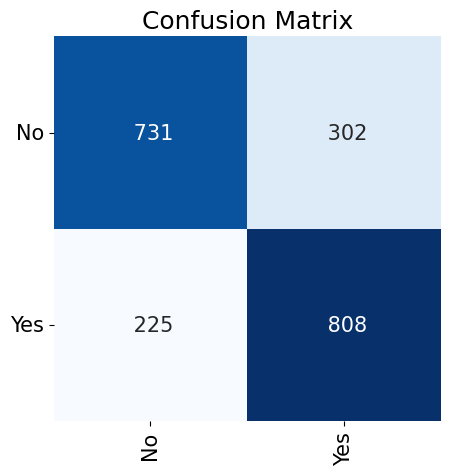

In [29]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_values,y_pred=bnb_prediction),
                                      annot=True,
                                      cmap=plt.cm.Blues,
                                      fmt = "4d",
                                      xticklabels=class_labels,
                                      yticklabels=class_labels,
                                      cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [30]:
with open(file="models/BernoulliNB_model.pkl", mode="wb") as file:
    pickle.dump(obj=bnb_model, file=file)

---

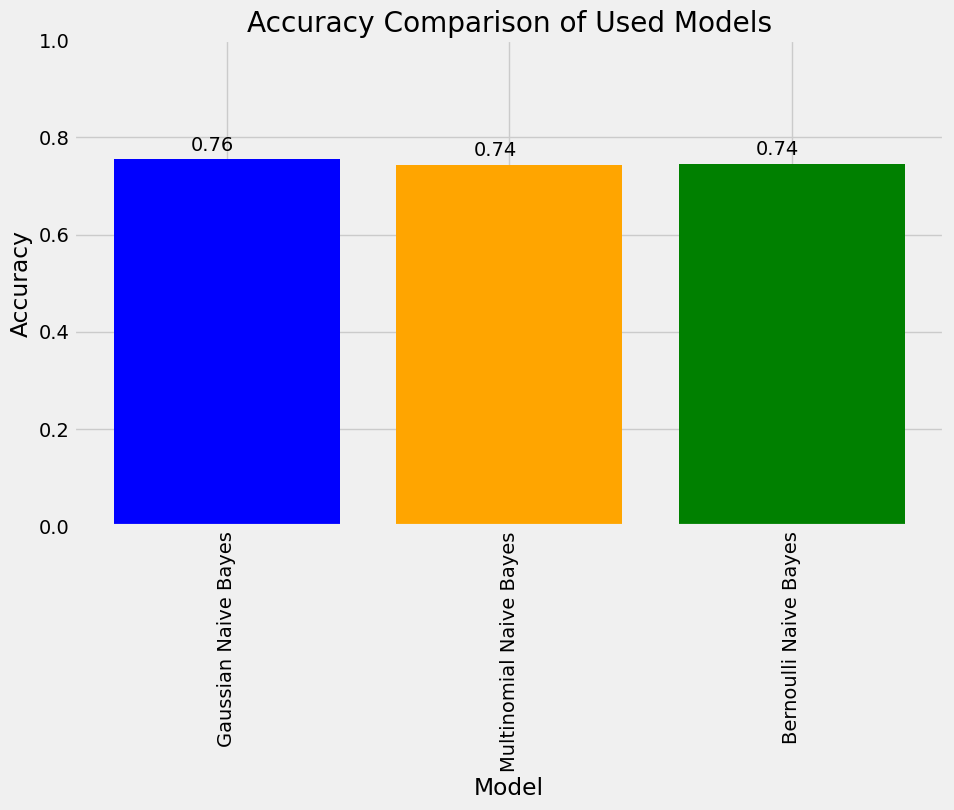

In [31]:
models = [
    'Gaussian Naive Bayes',
    'Multinomial Naive Bayes',
    'Bernoulli Naive Bayes'
]

accuracies = [
    gnb_model_accuracy,
    mnb_model_accuracy,
    bnb_model_accuracy
]

with plt.style.context(style="fivethirtyeight"):
    fig, ax = plt.subplots(figsize=(10, 6))

    bars = plt.bar(x=models, height=accuracies, color=['blue', 'orange', 'green', 'red'])
    plt.ylim(0, 1)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.title('Accuracy Comparison of Used Models')
    for bar, accuracy in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')
    plt.show()

---

# Algorithm-4 ArtificialNeuralNetwork

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
y_train, y_test = to_categorical(y_train.values.ravel()), to_categorical(y_test.values.ravel())

In [33]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.4))
model.add(Dense(units=y_train.shape[1], activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [35]:
EPOCHS = 100

history = model.fit(
    x=X_train.values,
    y=y_train,
    batch_size=32,
    epochs=EPOCHS,
    validation_data=(X_test.values, y_test),
    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', min_lr=0, patience=2)]
)

Epoch 1/100
259/259 [==============================] - 8s 19ms/step - loss: 0.6431 - accuracy: 0.7183 - val_loss: 0.5789 - val_accuracy: 0.7449 - lr: 0.0010
Epoch 2/100
259/259 [==============================] - 4s 17ms/step - loss: 0.5206 - accuracy: 0.7600 - val_loss: 0.4826 - val_accuracy: 0.7778 - lr: 0.0010
Epoch 3/100
259/259 [==============================] - 4s 17ms/step - loss: 0.4891 - accuracy: 0.7703 - val_loss: 0.4747 - val_accuracy: 0.7783 - lr: 0.0010
Epoch 4/100
259/259 [==============================] - 5s 21ms/step - loss: 0.4672 - accuracy: 0.7835 - val_loss: 0.4474 - val_accuracy: 0.7870 - lr: 0.0010
Epoch 5/100
259/259 [==============================] - 4s 17ms/step - loss: 0.4462 - accuracy: 0.7978 - val_loss: 0.4710 - val_accuracy: 0.7585 - lr: 0.0010
Epoch 6/100
259/259 [==============================] - 5s 19ms/step - loss: 0.4312 - accuracy: 0.8057 - val_loss: 0.4189 - val_accuracy: 0.7948 - lr: 0.0010
Epoch 7/100
259/259 [==============================] - 5s 

Epoch 52/100
259/259 [==============================] - 8s 30ms/step - loss: 0.1861 - accuracy: 0.9212 - val_loss: 0.3121 - val_accuracy: 0.8901 - lr: 1.0000e-18
Epoch 53/100
259/259 [==============================] - 7s 27ms/step - loss: 0.1859 - accuracy: 0.9243 - val_loss: 0.3122 - val_accuracy: 0.8916 - lr: 1.0000e-19
Epoch 54/100
259/259 [==============================] - 6s 24ms/step - loss: 0.1891 - accuracy: 0.9202 - val_loss: 0.3110 - val_accuracy: 0.8911 - lr: 1.0000e-19
Epoch 55/100
259/259 [==============================] - 6s 23ms/step - loss: 0.1912 - accuracy: 0.9182 - val_loss: 0.3107 - val_accuracy: 0.8911 - lr: 1.0000e-20
Epoch 56/100
259/259 [==============================] - 7s 27ms/step - loss: 0.1903 - accuracy: 0.9157 - val_loss: 0.3099 - val_accuracy: 0.8901 - lr: 1.0000e-20
Epoch 57/100
259/259 [==============================] - 10s 37ms/step - loss: 0.1889 - accuracy: 0.9182 - val_loss: 0.3119 - val_accuracy: 0.8901 - lr: 1.0000e-21
Epoch 58/100
259/259 [=====

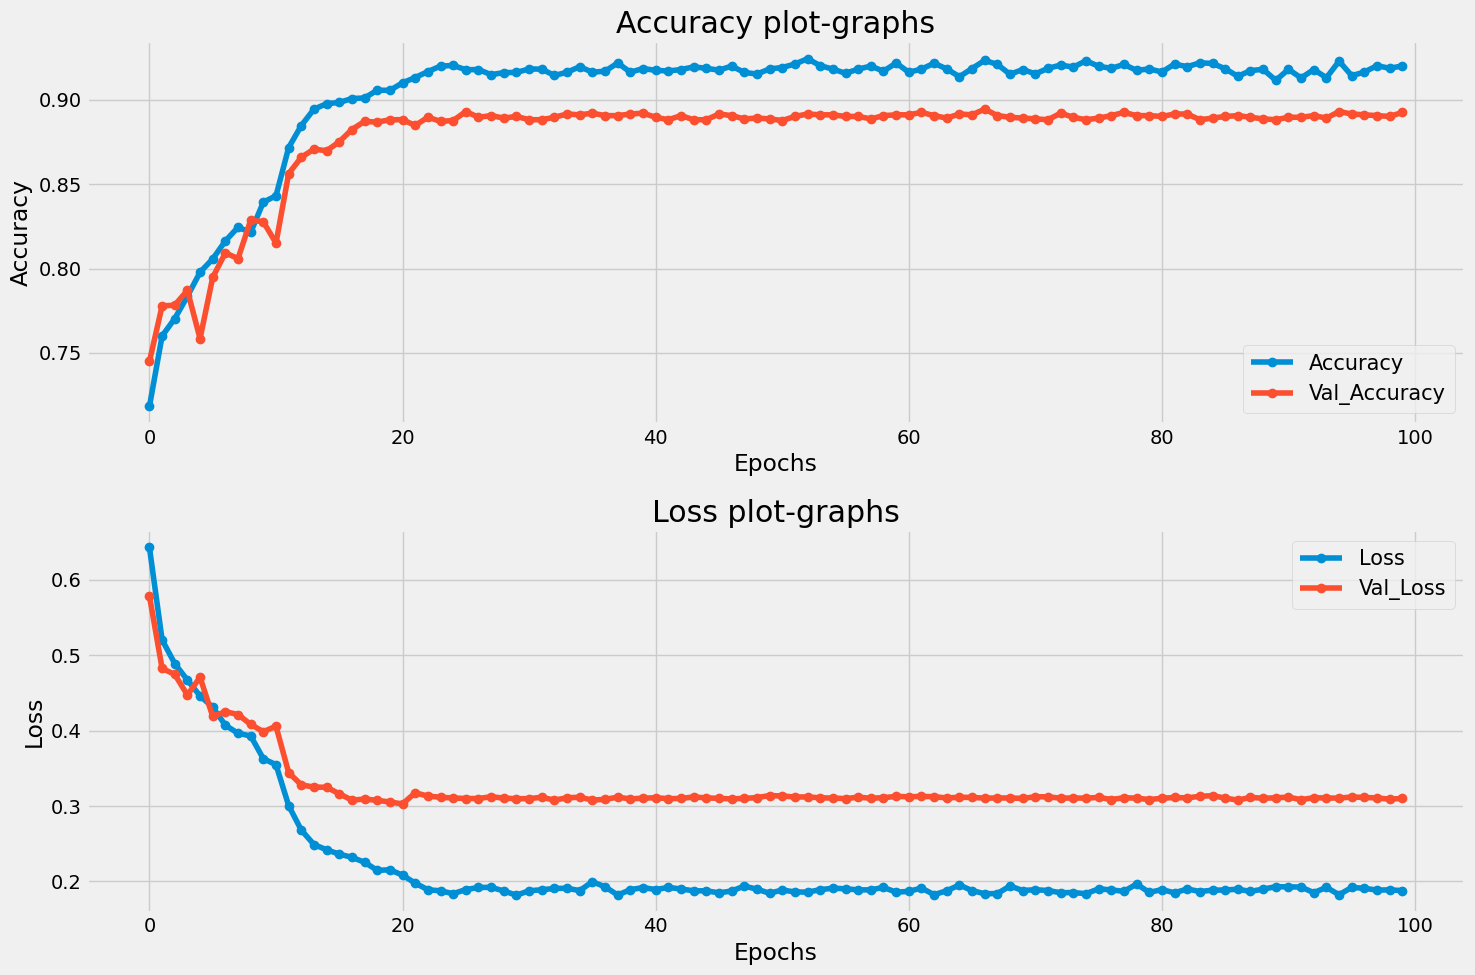

In [36]:
with plt.style.context(style="fivethirtyeight"):
    fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(15,10))
    plt.rcParams["font.size"]=15
    axes[0].plot(history.history['accuracy'],label='Accuracy',marker='o')
    axes[0].plot(history.history['val_accuracy'],label='Val_Accuracy',marker='o')
    axes[0].set_title(label='Accuracy plot-graphs')
    axes[0].set_xlabel(xlabel='Epochs')
    axes[0].set_ylabel(ylabel='Accuracy')
    axes[0].legend()
    axes[1].plot(history.history['loss'],label='Loss',marker='o')
    axes[1].plot(history.history['val_loss'],label='Val_Loss',marker='o')
    axes[1].set_title(label='Loss plot-graphs')
    axes[1].set_xlabel(xlabel='Epochs')
    axes[1].set_ylabel(ylabel='Loss')
    axes[1].legend()
    fig.tight_layout()
    plt.show()

In [37]:
ann_prediction = model.predict(X_test.values, batch_size=32, verbose=1)
print(ann_prediction)

65/65 [==============================] - 1s 6ms/step
[[9.97589946e-01 2.54061818e-03]
 [1.00000000e+00 1.14069294e-07]
 [1.15427375e-03 9.98809934e-01]
 ...
 [1.71507001e-02 9.82973278e-01]
 [2.66531110e-03 9.97205079e-01]
 [1.38491392e-04 9.99861717e-01]]


In [38]:
ann_prediction = ann_prediction.argmax(axis=1).tolist()
print(ann_prediction)

[0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 

In [39]:
true_values = y_test.argmax(axis=1).tolist()
print(true_values)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 

### Result Analysis

In [40]:
class_labels = ['No', 'Yes']

***Accuracy Score***

In [41]:
ann_model_accuracy = accuracy_score(y_true=true_values, y_pred=ann_prediction)
print("Validation accuracy of ArtificialNeuralNetwork model is {:.2f}%".format(ann_model_accuracy*100))

Validation accuracy of ArtificialNeuralNetwork model is 89.25%


***Classification Report***

In [42]:
print(classification_report(y_true=true_values, y_pred=ann_prediction, target_names=class_labels))

              precision    recall  f1-score   support

          No       0.92      0.86      0.89      1033
         Yes       0.87      0.93      0.90      1033

    accuracy                           0.89      2066
   macro avg       0.89      0.89      0.89      2066
weighted avg       0.89      0.89      0.89      2066



***Confusion Matrix***

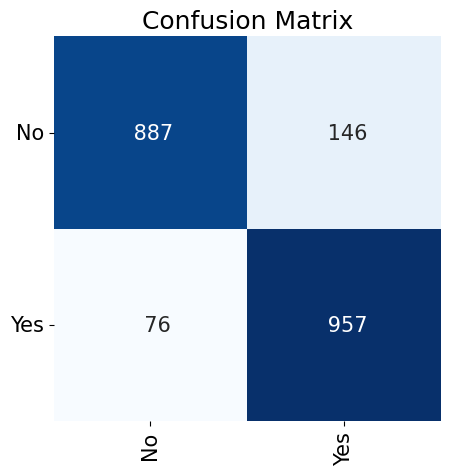

In [43]:
plt.figure(figsize=(5,5))
plt.rcParams['font.size'] = 15
sns.heatmap(data=confusion_matrix(y_true=true_values,y_pred=ann_prediction),
                                      annot=True,
                                      cmap=plt.cm.Blues,
                                      fmt = "4d",
                                      xticklabels=class_labels,
                                      yticklabels=class_labels,
                                      cbar=False)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

***Model Saving***

In [44]:
model.save("models/ArtificialNeuralNetwork_model.h5")

---

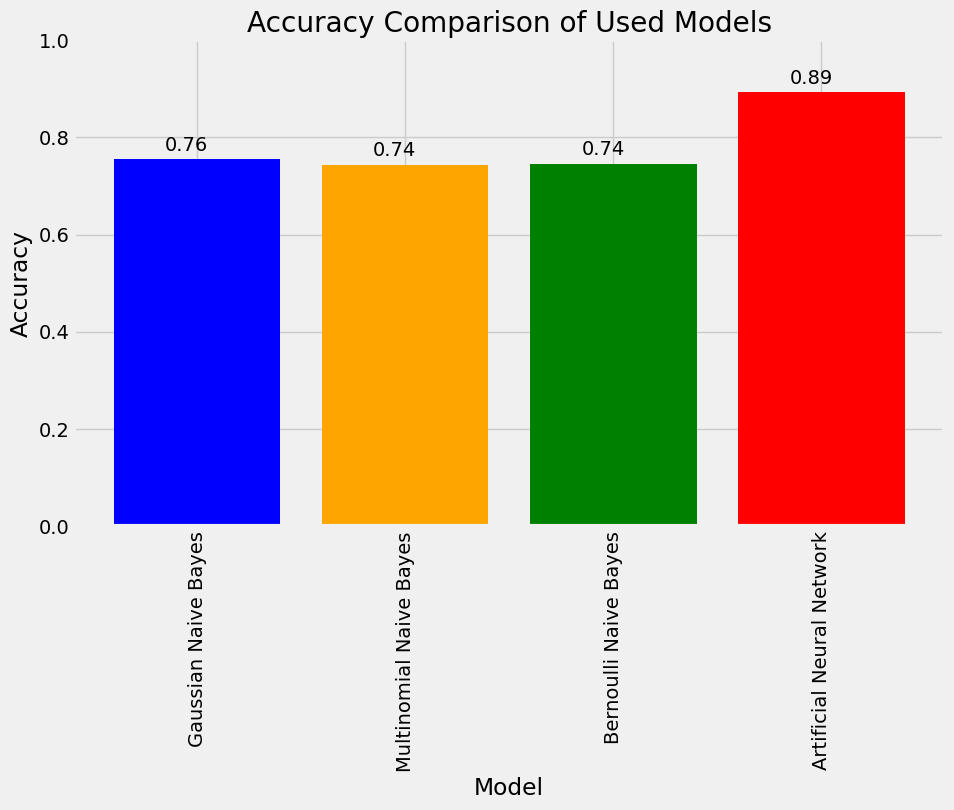

In [45]:
models = [
    'Gaussian Naive Bayes',
    'Multinomial Naive Bayes',
    'Bernoulli Naive Bayes',
    'Artificial Neural Network'
]

accuracies = [
    gnb_model_accuracy,
    mnb_model_accuracy,
    bnb_model_accuracy,
    ann_model_accuracy
]

with plt.style.context(style="fivethirtyeight"):
    fig, ax = plt.subplots(figsize=(10, 6))

    bars = plt.bar(x=models, height=accuracies, color=['blue', 'orange', 'green', 'red'])
    plt.ylim(0, 1)
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.title('Accuracy Comparison of Used Models')
    for bar, accuracy in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', va='bottom')
    plt.show()

---